<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/3_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/hunkim/DeepLearningZeroToAll/blob/master/tf2/tf2-03-1-minimizing_cost_show_graph.py

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]

In [ ]:
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1))

sgd = tf.keras.optimizers.SGD(lr=0.1)
tf.model.compile(loss='mse', optimizer=sgd)

tf.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = tf.model.fit(x_train, y_train, epochs=100)

y_predict = tf.model.predict(np.array([5,4]))
print(y_predict)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 4.5213
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 3.2131
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 2.3049
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 1.6743
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 1.2363
Epoch 6/100
1/1 [==============================] - 0s 44ms/step - loss: 0.9319
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 0.7202
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 0.5729
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4703
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 0.3986
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3485
Epoch 12/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3133
Epoch 13/100
1/1 [==============================] -

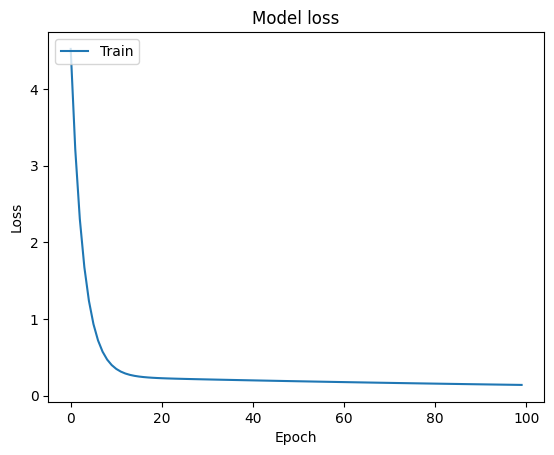

In [ ]:
# 반복학습에 따른 오차값 시각화
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 직접구현

https://sjkoding.tistory.com/67

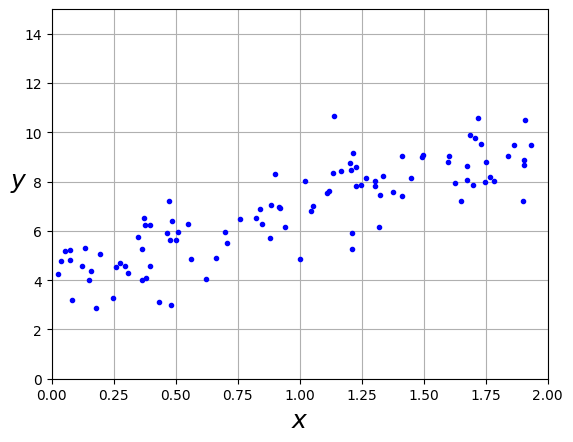

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 랜덤 데이터 생성
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

plt.plot(X,y,'b.')
plt.grid()
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [ ]:
# 임의의 가중치 W와 편향값 b
W = np.random.randn(1)
b = np.random.randn(1)
print(W, b)

[1.84935654] [-0.2039743]


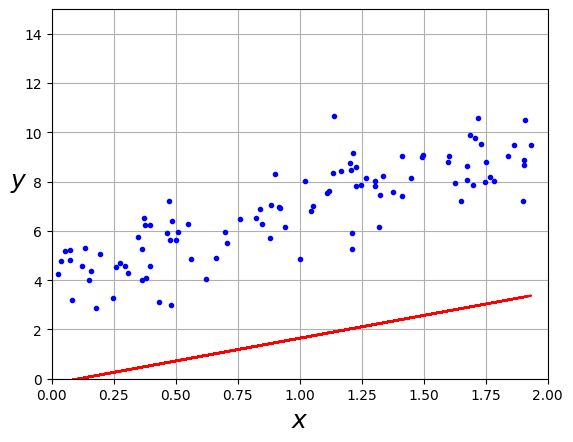

In [ ]:
# 위의 임의의 값인 W,b를 통해 그린 그래프
y_pred = W * X + b
plt.plot(X,y_pred,'r-')
plt.plot(X,y,'b.')
plt.grid()
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [ ]:
# MSE 함수
def MSE(y, y_pred):
    m = len(y)
    cost = (1/m) * np.sum(np.square(y_pred-y)) # 오차값을 제곱하여 평균

    return cost

print(MSE(y, y_pred))

28.56434881702618


In [ ]:
# 경사하강법

y_preds = []
epochs = 1000
epsilon = 0.03
learning_rate = 0.001

for epoch in range(epochs):
    # 예측값 계산
    y_pred = W * X + b #예측값
    y_preds.append(y_pred)

    # MSE 계산
    mse = np.mean((y_pred - y)**2)

    # mse(오차제곱의평균)값이 epsilon값보다 작다면 반복검사를 멈춤
    if mse < epsilon:
        print("Reached MSE below 0.03")
        break

    # w와 b 업데이트
    w_gradient = (2/len(X)) * np.dot(X.T, (y_pred - y)).sum() # w미분 = w경사
    b_gradient = (2/len(X)) * np.sum(y_pred - y) # b미분 = b경사
    W -= learning_rate * w_gradient
    b -= learning_rate * b_gradient

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, MSE: {mse:.4f}')

print(f'Final Parameters: w={W[0]:.4f}, b={b[0]:.4f}')

Epoch: 0, MSE: 6.8665
Epoch: 100, MSE: 4.0293
Epoch: 200, MSE: 2.7818
Epoch: 300, MSE: 2.2180
Epoch: 400, MSE: 1.9493
Epoch: 500, MSE: 1.8089
Epoch: 600, MSE: 1.7250
Epoch: 700, MSE: 1.6669
Epoch: 800, MSE: 1.6212
Epoch: 900, MSE: 1.5821
Final Parameters: w=3.9540, b=2.7338


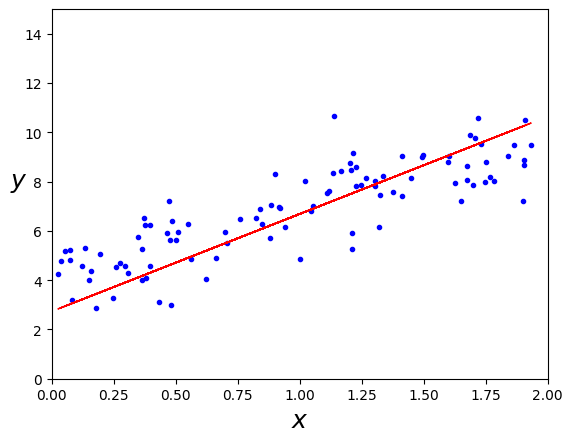

In [ ]:
# 결과값을 통한 시각화
plt.figure()
plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'r-', linewidth=1)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

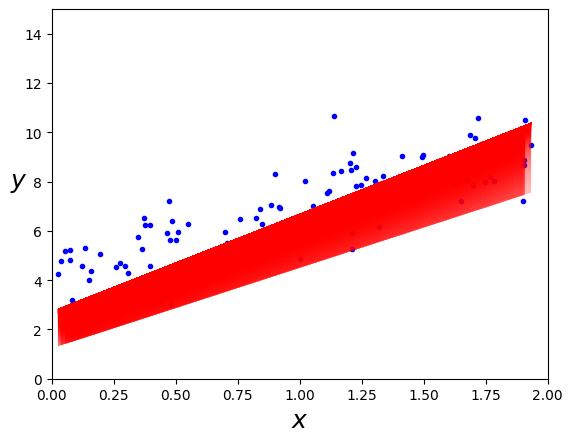

In [ ]:
# 각 변화값에 대한 시각화
plt.figure()
plt.plot(X, y, 'b.')
for index, y_pred in enumerate(y_preds):
    plt.plot(X, y_pred, 'r-', alpha = 0.3 + (0.7/len(y_preds))*index, linewidth=0.1)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

https://canvas4sh.tistory.com/194


손실함수(loss function)

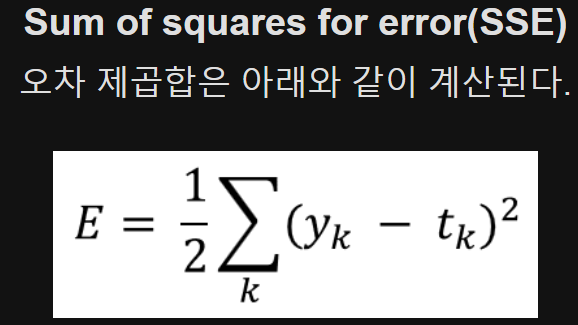

In [44]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 실제값은 5임
t = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


# 예1: '5'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.6, 0.0, 0.1, 0.0, 0.0]
result = mean_squared_error(np.array(y), np.array(t))
print(result)

# 예2 '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
result = mean_squared_error(np.array(y), np.array(t))
print(result)



0.09750000000000003
0.5974999999999999


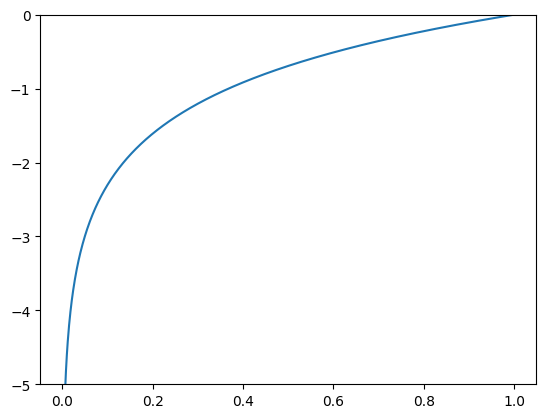

In [42]:
#자연로그 y=logx 그래프

%matplotlib inline
import matplotlib.pylab as plt

x = np.arange(0.001, 1.0, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.ylim(-5.0, 0.0) # y축의 범위 지정
plt.show()

In [43]:
#교차 엔트로피 구현
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

# 결과: 0.51082545709933802

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546